In [2]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [23]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
testlist=[['1',['c1','c2'],['c1','c2']],
         ['2',['c1','c2','c3','c4'],['c1','c1','c3']],
         ['3',['c2','c4'],['c2','c2','c4','c4']]]
test_df = pd.DataFrame(
    testlist, columns=['id','author_country','funder_country'])
test_df.head()

,id,author_country,funder_country
0,1,"[c1, c2]","[c1, c2]"
1,2,"[c1, c2, c3, c4]","[c1, c1, c3]"
2,3,"[c2, c4]","[c2, c2, c4, c4]"


In [24]:
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],NaN,89,2018,0.000,0
12759124,65301286,"[Singapore, Singapore]",NaN,44,2017,0.264,1
12759125,65301288,[Iran],NaN,96,2017,0.000,0
12759126,65301295,[Israel],NaN,96,2017,0.000,0


In [25]:
funder_df=pubs_author_funder[['id','funder_country']]
funder_df = funder_df.dropna()
funder_df.head()

,id,funder_country
0,30507292,[Turkey]
1,30574690,"[United States, United States, United States, ..."
2,30574691,[Russia]
3,30585095,"[Spain, Spain, Spain, Spain, Spain, Spain]"
4,30585097,[Spain]


In [26]:
funding_units=funder_df.explode('funder_country')
funding_units.head()

,id,funder_country
0,30507292,Turkey
1,30574690,United States
1,30574690,United States
1,30574690,United States
1,30574690,United States


In [27]:
funding_units = funding_units.groupby("funder_country").size().reset_index()
funding_units.columns=['funder_country','units']
funding_units.head()

,funder_country,units
0,Afghanistan,23
1,Albania,34
2,Algeria,2607
3,Andorra,53
4,Angola,76


In [63]:
funding_units[funding_units.funder_country=="United States"]

,funder_country,units
181,United States,4962957


In [28]:
author_units=pubs_author_funder[['id','author_country']]
author_units = author_units.explode("author_country")
author_units = author_units.groupby("author_country").size().reset_index()
author_units.columns=['author_country','units']
author_units.head()

,author_country,units
0,Afghanistan,503
1,Albania,1896
2,Algeria,37076
3,Andorra,72
4,Angola,579


In [29]:
avg_units_list = []
for index, row in author_units.iterrows():
    cntry=row['author_country']
    author_link=row['units']
    try:
        fund_count = funding_units[
            funding_units.funder_country==cntry]['units'].values[0]
    except:
        fund_count=0
    unit_per_author=fund_count/author_link
    avg_units_list.append([cntry, unit_per_author])

In [30]:
avg_units_df = pd.DataFrame(avg_units_list, columns=['author_country','avg_unit'])
avg_units_df.head()

,author_country,avg_unit
0,Afghanistan,0.045726
1,Albania,0.017932
2,Algeria,0.070315
3,Andorra,0.736111
4,Angola,0.131261


In [13]:
avg_units_df.sort_values(by='avg_unit', ascending=False).head(15)

,author_country,avg_unit
38,China,1.561877
58,Estonia,0.981993
178,Sweden,0.886877
62,Finland,0.829210
196,United States,0.825201
48,Czech Republic,0.807048
147,Portugal,0.806995
171,Spain,0.786083
24,Brazil,0.769177
7,Argentina,0.762406


In [31]:
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [15]:
author_df=pubs_author_funder[['id','author_country']]
author_df=author_df.explode("author_country")
author_df.head()

,id,author_country
0,30507292,Turkey
1,30574690,United States
1,30574690,France
2,30574691,Russia
3,30585095,Spain


In [31]:
avg_units_df.head()

,author_country,avg_unit
0,Afghanistan,0.045726
1,Albania,0.017932
2,Algeria,0.070315
3,Andorra,0.736111
4,Angola,0.131261


In [16]:
author_df=author_df.merge(avg_units_df,on='author_country', how="left")
author_df.head()

,id,author_country,avg_unit
0,30507292,Turkey,0.188963
1,30574690,United States,0.825201
2,30574690,France,0.335436
3,30574691,Russia,0.642497
4,30585095,Spain,0.786083


In [33]:
author_df.head(30)

,id,author_country,avg_unit
0,30507292,Turkey,0.188963
1,30574690,United States,0.825201
2,30574690,France,0.335436
3,30574691,Russia,0.642497
4,30585095,Spain,0.786083
5,30585095,Spain,0.786083
6,30585097,Germany,0.479307
7,30585097,Spain,0.786083
8,30585101,United States,0.825201
9,30585102,United States,0.825201


In [17]:
pub_funder_units = author_df.groupby(['id','author_country'])['avg_unit'].sum()
pub_funder_units

id        author_country
30258899  United States     0.825201
          Vietnam           0.265713
30258900  France            0.335436
          Vietnam           0.265713
30258901  France            0.335436
                              ...   
65301319  China             1.561877
65301320  Russia            1.284994
          Ukraine           0.156310
          United Kingdom    0.559213
65301322  China             1.561877
Name: avg_unit, Length: 17371666, dtype: float64

In [19]:
pub_funder_units = pub_funder_units.reset_index()
pub_funder_units.columns=['id','funder_country','cntry_units']
pub_funder_units

,id,funder_country,cntry_units
0,30258899,United States,0.825201
1,30258899,Vietnam,0.265713
2,30258900,France,0.335436
3,30258900,Vietnam,0.265713
4,30258901,France,0.335436
...,...,...,...
17371661,65301319,China,1.561877
17371662,65301320,Russia,1.284994
17371663,65301320,Ukraine,0.156310
17371664,65301320,United Kingdom,0.559213


In [32]:
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],NaN,89,2018,0.000,0
12759124,65301286,"[Singapore, Singapore]",NaN,44,2017,0.264,1
12759125,65301288,[Iran],NaN,96,2017,0.000,0
12759126,65301295,[Israel],NaN,96,2017,0.000,0


In [21]:
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [34]:
author_funder_null=pubs_author_funder[['id','author_country']].merge(
    pub_funder_units, on="id", how="left")
author_funder_null.head()

,id,author_country,funder_country,cntry_units
0,30507292,[Turkey],Turkey,0.188963
1,30574690,"[United States, France]",France,0.335436
2,30574690,"[United States, France]",United States,0.825201
3,30574691,[Russia],Russia,0.642497
4,30585095,"[Spain, Spain]",Spain,1.572167


In [38]:
def generate_null(data):
    cntry_cntry_explodelist = []
    for index, row in tqdm(data.iterrows()):
        units = row['cntry_units']
        author_country = row['author_country']
        funding_country=row['funder_country']
        num_author = len(author_country)
        for author_c in author_country:
            credit = units/num_author
            templist = [funding_country,author_c, credit]
            cntry_cntry_explodelist.append(templist)
                
    cntry_cntry_null = pd.DataFrame(
        cntry_cntry_explodelist, columns=['source','target','value'])
    cntry_cntry_null = cntry_cntry_null.groupby(['source','target'])['value'].sum().reset_index()
    cntry_cntry_null = cntry_cntry_null.pivot_table(
        index='source',columns='target', values='value', fill_value=0)
    return cntry_cntry_null


In [37]:
from tqdm import tqdm

In [39]:
unitavg_matrix=generate_null(author_funder_null)

8it [00:00, 4601.54it/s]


In [40]:
unitavg_matrix

target,c1,c2,c3,c4
source,,,,
c1,1.125,1.125,0.375,0.375
c2,0.750,1.250,0.250,0.750
c3,0.250,0.250,0.250,0.250
c4,0.250,0.750,0.250,0.750


In [17]:
unitavg_matrix.to_csv("unitavg_matrix.csv")

In [35]:
unitavg_matrix=pd.read_csv("unitavg_matrix.csv")
unitavg_matrix=unitavg_matrix.set_index("source")
unitavg_matrix.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.435452,0.000000,0.001665,0.000000,0.003412,0.0,0.000000,0.002611,0.000000,0.140503,...,3.248782,0.001894,0.015242,0.0,0.0,0.001633,0.020070,0.000194,0.003570,0.000000
Albania,0.000000,20.006873,0.017805,0.000359,0.000000,0.0,0.000000,0.008421,0.008285,0.079032,...,0.765673,0.009032,0.001260,0.0,0.0,0.012371,0.000748,0.000645,0.002889,0.000000
Algeria,0.002561,0.069814,1877.328140,0.000000,0.020219,0.0,0.000000,0.719973,0.053852,2.430288,...,20.213717,0.006328,0.038354,0.0,0.0,0.170147,1.013904,0.279058,0.019129,0.038605
Andorra,0.000000,0.014722,0.000000,15.577223,0.000000,0.0,0.000000,0.162518,0.014722,0.060723,...,1.465716,0.019120,0.000000,0.0,0.0,0.149373,0.000000,0.000000,0.000000,0.000000
Angola,0.009795,0.000000,0.037744,0.000000,27.985455,0.0,0.011933,0.173435,0.000000,0.656896,...,4.391791,0.090373,0.000000,0.0,0.0,0.030774,0.054495,0.013126,0.034213,0.040708


In [5]:
unitavg_matrix.sum(axis=1)

source
Afghanistan      23.0
Albania          34.0
Algeria        2607.0
Andorra          53.0
Angola           76.0
                ...  
Venezuela      2407.0
Vietnam        9398.0
Yemen           172.0
Zambia          155.0
Zimbabwe        317.0
Length: 206, dtype: float64

In [36]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [10]:
cntry_cntry_df.sum(axis=1)

source
Afghanistan      23.0
Albania          34.0
Algeria        2607.0
Andorra          53.0
Angola           76.0
                ...  
Venezuela      2407.0
Vietnam        9398.0
Yemen           172.0
Zambia          155.0
Zimbabwe        317.0
Length: 191, dtype: float64

In [12]:
unitavg_matrix.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.435452,0.000000,0.001665,0.000000,0.003412,0.0,0.000000,0.002611,0.000000,0.140503,...,3.248782,0.001894,0.015242,0.0,0.0,0.001633,0.020070,0.000194,0.003570,0.000000
Albania,0.000000,20.006873,0.017805,0.000359,0.000000,0.0,0.000000,0.008421,0.008285,0.079032,...,0.765673,0.009032,0.001260,0.0,0.0,0.012371,0.000748,0.000645,0.002889,0.000000
Algeria,0.002561,0.069814,1877.328140,0.000000,0.020219,0.0,0.000000,0.719973,0.053852,2.430288,...,20.213717,0.006328,0.038354,0.0,0.0,0.170147,1.013904,0.279058,0.019129,0.038605
Andorra,0.000000,0.014722,0.000000,15.577223,0.000000,0.0,0.000000,0.162518,0.014722,0.060723,...,1.465716,0.019120,0.000000,0.0,0.0,0.149373,0.000000,0.000000,0.000000,0.000000
Angola,0.009795,0.000000,0.037744,0.000000,27.985455,0.0,0.011933,0.173435,0.000000,0.656896,...,4.391791,0.090373,0.000000,0.0,0.0,0.030774,0.054495,0.013126,0.034213,0.040708


In [14]:
unitavg_matrix.loc['China']

Afghanistan       3.205856
Albania           8.878552
Algeria         265.381438
Andorra           0.000000
Angola            0.827086
                  ...     
Venezuela        50.718880
Vietnam        1107.122154
Yemen            40.588541
Zambia           50.606736
Zimbabwe         33.617654
Name: China, Length: 206, dtype: float64

In [37]:
def get_normedmatrix(indexlist, collist, actual_df, random_df):
    
    randomnormed_df = pd.DataFrame(
        index=indexlist,columns=collist)
    for ind, col in product(indexlist, collist):
        try:
            actual_value=actual_df.loc[ind,col]
        except:
            actual_value=0
        random_value=random_df.loc[ind,col]
        exp=actual_value/random_value
        randomnormed_df.loc[ind,col]=exp
    randomnormed_df = randomnormed_df.fillna(0)
    
    return randomnormed_df


In [38]:
cntrylist=list(cntry_cntry_df.columns)
cntry_cntry_normed=get_normedmatrix(
    cntrylist, cntrylist, cntry_cntry_df, unitavg_matrix)
cntry_cntry_normed

<ipython-input-37-13d4e271a30e>:11: RuntimeWarning: invalid value encountered in double_scalars
  exp=actual_value/random_value
<ipython-input-37-13d4e271a30e>:11: RuntimeWarning: divide by zero encountered in double_scalars
  exp=actual_value/random_value


,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.052992,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,2.372434,...,0.707724,0.000000,0.0,0.0,0.0,0.000000,24.912274,0.000000,0.000000,0.000000
Albania,0.000000,0.441515,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,3.514757,...,1.306040,0.000000,0.0,0.0,0.0,0.000000,1336.774352,0.000000,0.000000,0.000000
Algeria,0.000000,0.000000,0.908921,0.000000,0.00000,0.0,0.0,5.453250,0.000000,0.822077,...,1.085277,0.000000,0.0,0.0,0.0,0.000000,0.246572,1.194494,0.000000,0.000000
Andorra,0.000000,0.000000,0.000000,0.224687,0.00000,0.0,0.0,0.000000,0.000000,0.000000,...,2.660815,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.000000,0.000000,0.000000,0.000000,0.73543,0.0,0.0,0.000000,0.000000,4.034122,...,0.820253,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.000000,0.000000,0.038866,0.000000,0.00000,0.0,0.0,0.921908,0.000000,0.699823,...,0.867134,0.761112,0.0,0.0,0.0,1.001143,0.000000,0.000000,0.000000,0.000000
Vietnam,0.000000,0.000000,0.139199,0.000000,0.00000,0.0,0.0,1.922429,1.469441,1.051979,...,1.540551,0.800831,0.0,0.0,0.0,0.000000,1.051849,0.000000,0.000000,0.000000
Yemen,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.365641,...,0.202052,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.289180,0.000000,0.000000
Zambia,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,3.093165,...,0.918694,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.219762,0.974997,1.200448


In [9]:
import seaborn as sns

In [10]:
cntry_cntry_normed=cntry_cntry_normed.replace([np.inf, -np.inf], 0)
cntry_cntry_normed = cntry_cntry_normed.loc[~(cntry_cntry_normed==0).all(axis=1)]

In [13]:
cntry_cntry_log=cntry_cntry_normed+1
cntry_cntry_log = pd.DataFrame(
    np.log(cntry_cntry_log.values), index=cntry_cntry_log.index, columns=cntry_cntry_log.columns)
cntry_cntry_log.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.051635,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.215635,...,0.535162,0.0,0.0,0.0,0.0,0.0,3.254717,0.000000,0.0,0.0
Albania,0.000000,0.365695,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.507351,...,0.835532,0.0,0.0,0.0,0.0,0.0,7.198763,0.000000,0.0,0.0
Algeria,0.000000,0.000000,0.646538,0.000000,0.000000,0.0,0.0,1.864584,0.0,0.599977,...,0.734902,0.0,0.0,0.0,0.0,0.0,0.220397,0.785951,0.0,0.0
Andorra,0.000000,0.000000,0.000000,0.202685,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1.297686,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Angola,0.000000,0.000000,0.000000,0.000000,0.551255,0.0,0.0,0.000000,0.0,1.616239,...,0.598976,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [42]:
import matplotlib.colors as colors
divnorm = colors.DivergingNorm(vmin=0, vcenter=1, vmax=8)

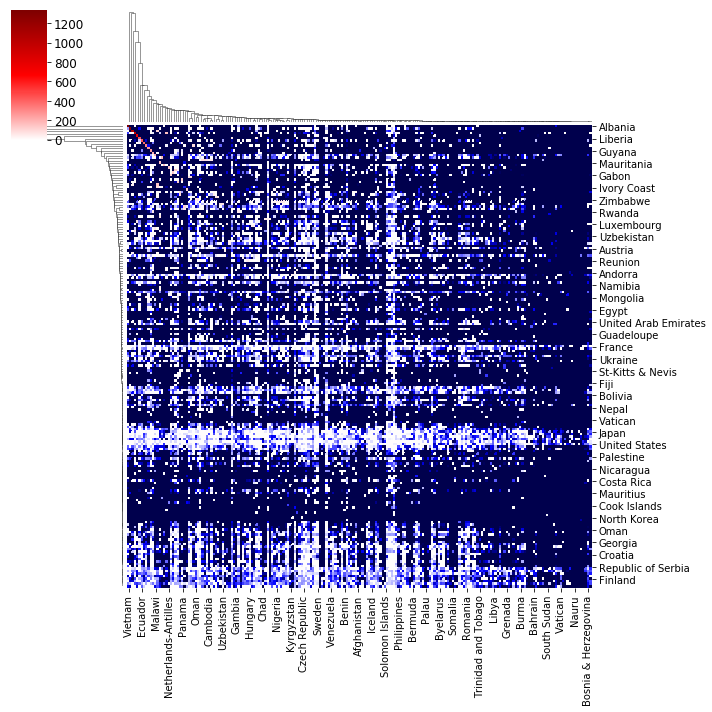

In [16]:

sns.clustermap(cntry_cntry_normed,cmap="seismic",norm=divnorm)
#plt.ylabel("proportion of units out", fontsize=14)
#plt.xlabel("proportion of units in", fontsize=14)
plt.tick_params(axis='both',labelsize=12)
plt.savefig("fullmatrix.pdf",format="pdf")

In [39]:
funding_units=funding_units[funding_units.funder_country!="EU"]
funding_units

,funder_country,units
0,Afghanistan,23
1,Albania,34
2,Algeria,2607
3,Andorra,53
4,Angola,76
...,...,...
186,Venezuela,2407
187,Vietnam,9398
188,Yemen,172
189,Zambia,155


In [40]:
top20 = funding_units.sort_values(
    by='units', ascending=False).head(20)['funder_country'].tolist()
top20


['China',
 'United States',
 'Japan',
 'United Kingdom',
 'Germany',
 'Spain',
 'Canada',
 'South Korea',
 'Brazil',
 'France',
 'Australia',
 'India',
 'Russia',
 'Taiwan',
 'Sweden',
 'Italy',
 'Switzerland',
 'Netherlands',
 'Belgium',
 'Portugal']

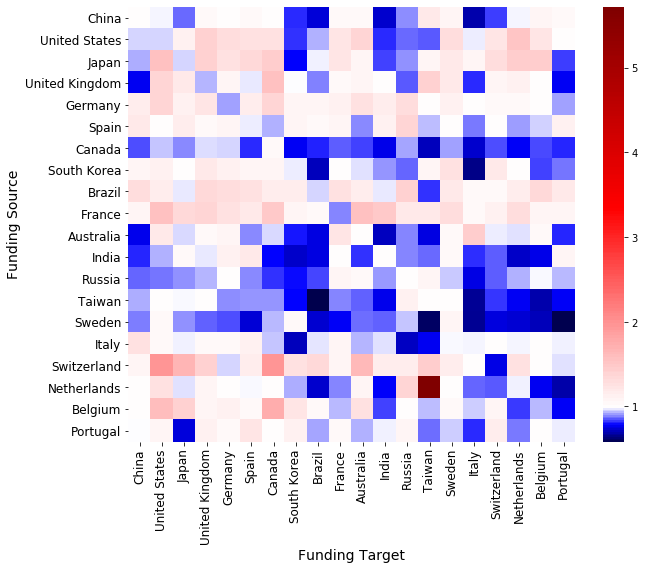

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cntry_cntry_normed.loc[top20,top20],cmap="seismic", norm=divnorm)
plt.ylabel("Funding Source", fontsize=14)
plt.xlabel("Funding Target", fontsize=14)
plt.tick_params(axis='both',labelsize=12)
plt.savefig("equalcontribution.pdf",bbox_inches="tight")